Домашняя работа №4

1. Написать код, реализующий симплекс-метод.

2.	Протестировать, используя задачу из предыдущего дз.


Пример:

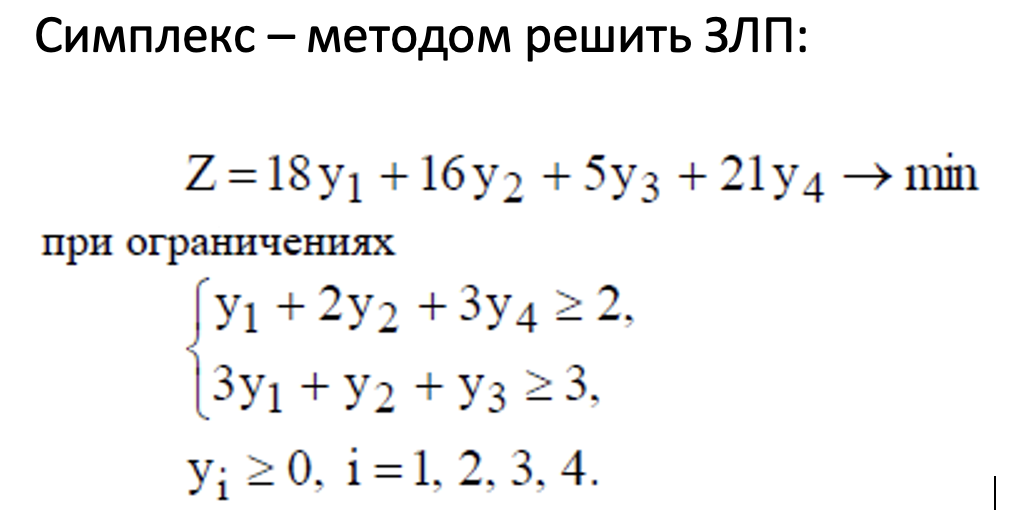

In [1]:
import numpy as np

In [2]:
class LinearModel:
    
    def __init__(self, A = np.empty([0,0]), b = np.empty([0,0]), c = np.empty([0,0]), minmax = "MAX"):
        self.A = A
        self.b = b
        self.c = c
        self.x = [float(0)] * len(c)
        self.minmax = minmax
        self.printIter = True
        self.optimalValue = None
        self.transform = False
        
    def addA(self, A):
        self.A = A
        
    def addB(self, b):
        self.b = b
        
    def addC(self, c):
        self.c = c
        self.transform = False
    
    def setObj(self, minmax):
        if(minmax == "MIN" or minmax == "MAX"):
            self.minmax = minmax
        else:
            print("Неверный тип целевой функции")
        self.transform = False
            
    def setPrintIter(self, printIter):
        self.printIter = printIter
            
    def printSoln(self):
        print("Коэффициенты: ")
        print(self.x)
        print("Оптимальное значение: ")
        print(self.optimalValue)
        
    def printTableau(self, tableau):
        
        print("ind \t\t", end = "")
        for j in range(0, len(c)):
            print("x_" + str(j), end = "\t")
        for j in range(0, (len(tableau[0]) - len(c) - 2)):
            print("s_" + str(j), end = "\t")
        
        print()
        for j in range(0, len(tableau)):
            for i in range(0, len(tableau[0])):
                if(not np.isnan(tableau[j, i])):
                    if(i == 0):
                        print(int(tableau[j, i]), end = "\t")
                    else:
                        print(round(tableau[j, i], 2), end = "\t")
                else:
                    print(end = "\t")
            print()
            
    def getTableau(self):

        
        if(self.minmax == "MIN" and self.transform == False):
            self.c[0:len(c)] = -1 * self.c[0:len(c)]
            self.transform = True
        
        t1 = np.array([None, 0])
        numVar = len(self.c)
        numSlack = len(self.A)
        
        t1 = np.hstack(([None], [0], self.c, [0] * numSlack))
        
        basis = np.array([0] * numSlack)
        
        for i in range(0, len(basis)):
            basis[i] = numVar + i
        
        A = self.A
        
        if(not ((numSlack + numVar) == len(self.A[0]))):
            B = np.identity(numSlack)
            A = np.hstack((self.A, B))
            
        t2 = np.hstack((np.transpose([basis]), np.transpose([self.b]), A))
        
        tableau = np.vstack((t1, t2))
        
        tableau = np.array(tableau, dtype ='float')
        
        return tableau
            
    def optimize(self):
        
        if(self.minmax == "MIN" and self.transform == False):
            for i in range(len(self.c)):
                self.c[i] = -1 * self.c[i]
                transform = True
        
        tableau = self.getTableau()
         
        if(self.printIter == True):
            print("Начальная симплекс-таблица:")
            self.printTableau(tableau)
        
        optimal = False

        iter = 1

        while(True):
            
            if(self.printIter == True):
                print("----------------------------------------")
                print("Итерация:", iter)
                self.printTableau(tableau)
                
            if(self.minmax == "MAX"):
                for profit in tableau[0, 2:]:
                    if profit > 0:
                        optimal = False
                        break
                    optimal = True
            else:
                for cost in tableau[0, 2:]:
                    if cost < 0:
                        optimal = False
                        break
                    optimal = True

            if optimal == True: 
                 break
            
            if (self.minmax == "MAX"):
                n = tableau[0, 2:].tolist().index(np.amax(tableau[0, 2:])) + 2
            else:
                n = tableau[0, 2:].tolist().index(np.amin(tableau[0, 2:])) + 2

            minimum = 99999
            r = -1

            for i in range(1, len(tableau)): 
                if(tableau[i, n] > 0):
                    val = tableau[i, 1]/tableau[i, n]
                    if val<minimum: 
                        minimum = val 
                        r = i
                            
            pivot = tableau[r, n] 
            
            print("Основной элемент: ", pivot)
            tableau[r, 1:] = tableau[r, 1:] / pivot 
            
            for i in range(0, len(tableau)): 
                if i != r:
                    mult = tableau[i, n] / tableau[r, n]
                    tableau[i, 1:] = tableau[i, 1:] - mult * tableau[r, 1:] 

            tableau[r, 0] = n - 2
            
            iter += 1
            
        
        if(self.printIter == True):
            print("----------------------------------------")
            print("Финальная симплекс-таблица достигнута за", iter, "итераций")
            self.printTableau(tableau)
        else:
            print("Решенная")
            
        self.x = np.array([0] * len(c), dtype = float)
        for key in range(1, (len(tableau))):
            if(tableau[key, 0] < len(c)):
                self.x[int(tableau[key, 0])] = tableau[key, 1]
        
        self.optimalValue = -1 * tableau[0,1]

In [5]:
model1 = LinearModel()

c = np.array([18, 16, 5, 21]) 
A = np.array([
    [1, 2, 0, 3],  # y1 + 2y2 + 3y4 >= 2
    [3, 1, 1, 0]   # 3y1 + y2 + y3 >= 3
])
b = np.array([2, 3])

model1.addA(A)
model1.addB(b)
model1.addC(c)

print("A =\n", A, "\n")
print("b =\n", b, "\n")
print("c =\n", c, "\n\n")
model1.optimize()
print("\n")
model1.printSoln()

A =
 [[1 2 0 3]
 [3 1 1 0]] 

b =
 [2 3] 

c =
 [18 16  5 21] 


Начальная симплекс-таблица:
ind 		x_0	x_1	x_2	x_3	s_0	s_1	
	0.0	18.0	16.0	5.0	21.0	0.0	0.0	
4	2.0	1.0	2.0	0.0	3.0	1.0	0.0	
5	3.0	3.0	1.0	1.0	0.0	0.0	1.0	
----------------------------------------
Итерация: 1
ind 		x_0	x_1	x_2	x_3	s_0	s_1	
	0.0	18.0	16.0	5.0	21.0	0.0	0.0	
4	2.0	1.0	2.0	0.0	3.0	1.0	0.0	
5	3.0	3.0	1.0	1.0	0.0	0.0	1.0	
Основной элемент:  3.0
----------------------------------------
Итерация: 2
ind 		x_0	x_1	x_2	x_3	s_0	s_1	
	-14.0	11.0	2.0	5.0	0.0	-7.0	0.0	
3	0.67	0.33	0.67	0.0	1.0	0.33	0.0	
5	3.0	3.0	1.0	1.0	0.0	0.0	1.0	
Основной элемент:  3.0
----------------------------------------
Итерация: 3
ind 		x_0	x_1	x_2	x_3	s_0	s_1	
	-25.0	0.0	-1.67	1.33	0.0	-7.0	-3.67	
3	0.33	0.0	0.56	-0.11	1.0	0.33	-0.11	
0	1.0	1.0	0.33	0.33	0.0	0.0	0.33	
Основной элемент:  0.3333333333333333
----------------------------------------
Итерация: 4
ind 		x_0	x_1	x_2	x_3	s_0	s_1	
	-29.0	-4.0	-3.0	0.0	0.0	-7.0	-5.0	
3	0.67	0.33	0.67	0.0

Скриншот работы программы


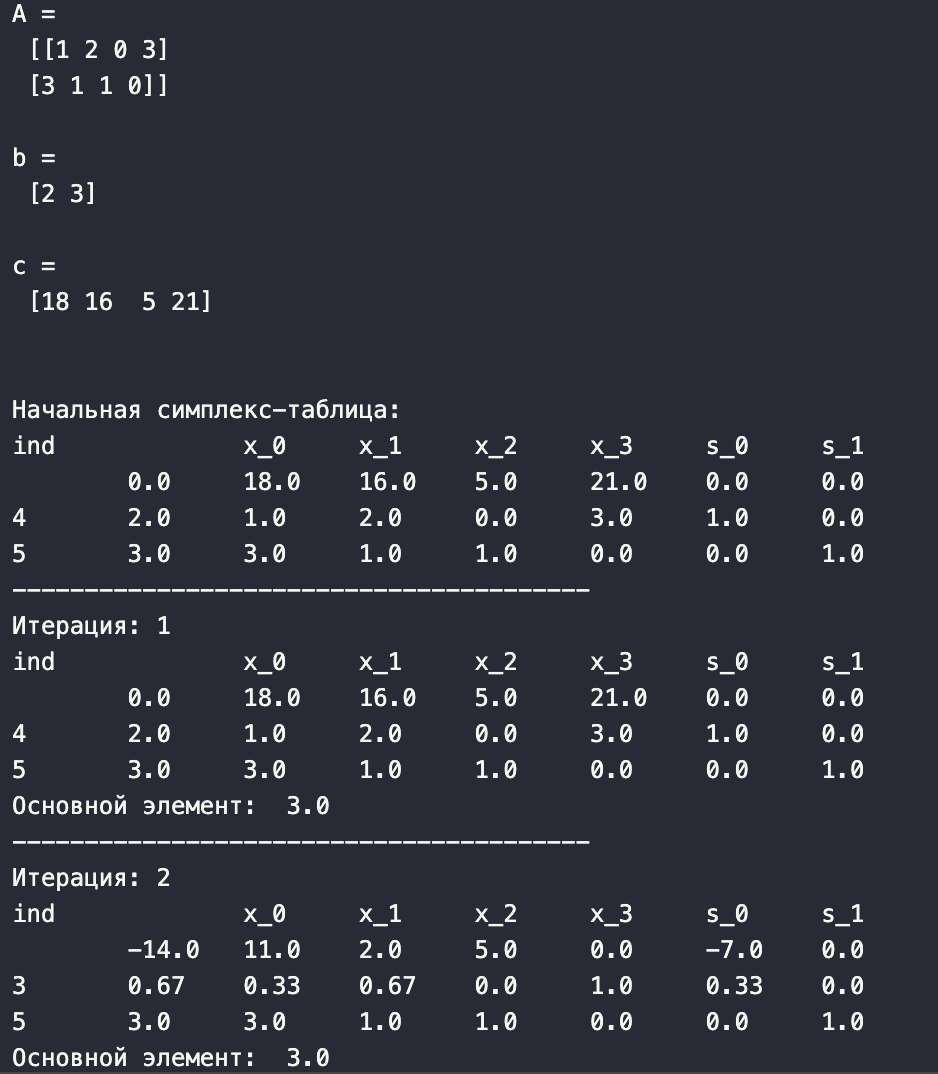
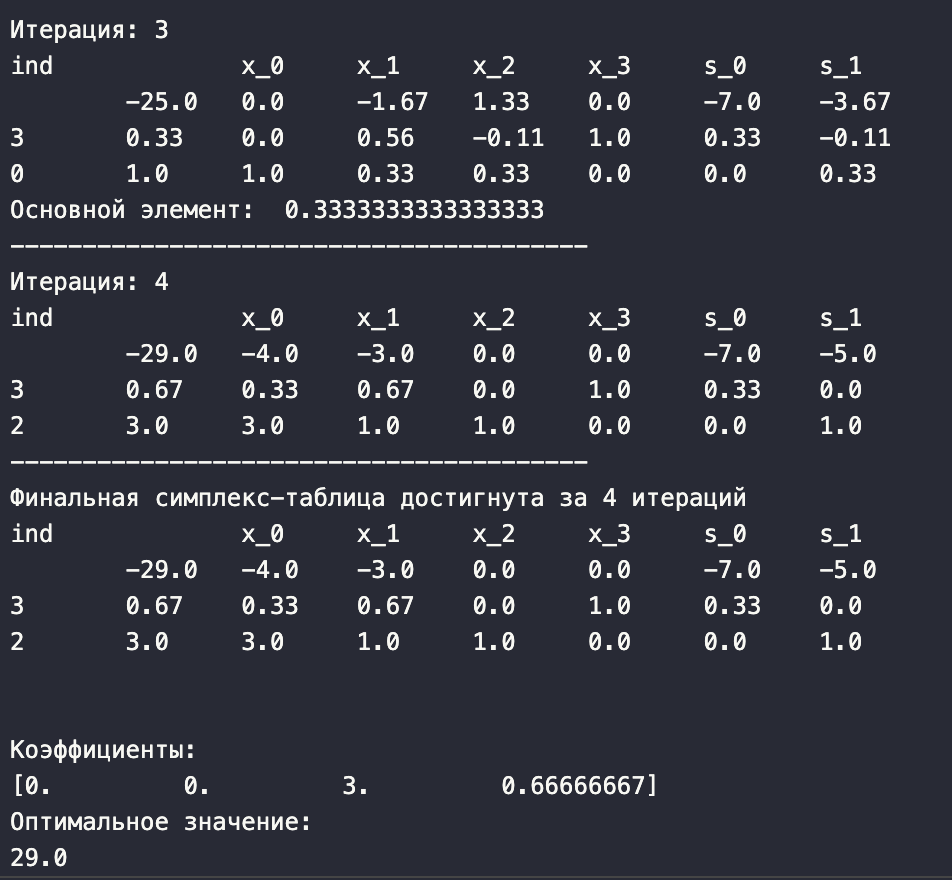